# Make Catologue

In [1]:
import os
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl

from imgprocesslib import homedir
from imgprocesslib.calibrationcpu import lim_mag

from astropy.stats import mad_std as mad
from astropy.coordinates import SkyCoord
import astropy.units as u

mpl.rcParams['font.family'] = 'Times New Roman'

In [2]:
files = []
for file in sorted(os.listdir(os.path.join(homedir, "Output"))):
    if 'convolved_depths' in file and '0.1' in file and '5.83' in file and file.endswith('.pkl'):
        files.append(file)
        print(file)

convolved_depths_f090w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f115w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f150w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f182m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f200w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f210m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f277w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f335m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f356w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f410m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f430m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f435w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f444w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f460m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f480m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f606w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f775w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_dept

In [3]:
skyflux_data = []
allfilename = []
for file in sorted(os.listdir(os.path.join(homedir, "Output"))):
    if 'convolved_depths' in file and '0.1' in file and '5.83' in file and file.endswith('.pkl'):
        with open(homedir+"Output/"+file, 'rb') as data:
            skyflux_data.append(pickle.load(data)['sky_flux'])
        
        allfilename.append(file.rsplit('_', 7)[1])

allfilename = allfilename
allfilename

['f090w',
 'f115w',
 'f150w',
 'f182m',
 'f200w',
 'f210m',
 'f277w',
 'f335m',
 'f356w',
 'f410m',
 'f430m',
 'f435w',
 'f444w',
 'f460m',
 'f480m',
 'f606w',
 'f775w',
 'f814w',
 'f850lp']

In [4]:
data_table = {
    'Filter': allfilename,
    'Sigma': [],
    'MAD Estimates': [],
    'Limiting Magnitudes': []
}

for i, skyflux in enumerate(skyflux_data):
    data_table['Sigma'].append(np.std(skyflux))
    data_table['MAD Estimates'].append(mad(skyflux))
    data_table['Limiting Magnitudes'].append(lim_mag(data_table['MAD Estimates'][i]))

data_table['Sigma'] = np.array(data_table['Sigma'])
data_table['MAD Estimates'] = np.array(data_table['MAD Estimates'])
data_table['Limiting Magnitudes'] = np.array(data_table['Limiting Magnitudes'])

In [5]:
data_table = pd.DataFrame(data_table)
styler = data_table.style
format_dict = {
    'Sigma': '{:0.3e}',
    'MAD Estimates': '{:0.3e}',
    'Limiting Magnitudes': '{:0}'
}
data_table_ = styler.format(format_dict)
data_table_

,Filter,Sigma,MAD Estimates,Limiting Magnitudes
0,f090w,9.250e-04,9.343e-04,29.726413126436572
1,f115w,7.511e-04,7.674e-04,29.940078964278033
2,f150w,7.831e-04,7.982e-04,29.897242286354338
3,f182m,1.586e-03,1.580e-03,29.15614360436721
4,f200w,7.513e-04,7.829e-04,29.918266615044043
5,f210m,2.402e-03,2.058e-03,28.86903809260147
6,f277w,5.499e-04,5.881e-04,30.228972852461943
7,f335m,9.961e-04,1.012e-03,29.639520769289177
8,f356w,6.274e-04,6.650e-04,30.095456708068454
9,f410m,9.676e-04,9.715e-04,29.68393648558355


In [6]:
# Loading the data
dataframe = pickle.load(open(homedir+"Output/"+"photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2.pkl", 'rb'))
dataframe

{'id': array([    0,     1,     2, ..., 36642, 36643, 36644], dtype=int64),
 'RA': array([53.1714874 , 53.17139849, 53.17174764, ..., 53.15731249,
        53.1571343 , 53.15710628]),
 'Dec': array([-27.84728918, -27.84723231, -27.84716785, ..., -27.72395359,
        -27.7239528 , -27.72393197]),
 'x-position': array([11832.72631508, 11842.15667088, 11805.10781026, ...,
        13332.57395067, 13351.50137464, 13354.47723462]),
 'y-position': array([ 2944.11848768,  2950.94577393,  2958.66636188, ...,
        17744.90823182, 17745.00822814, 17747.50874866]),
 'f090w': array([ 0.00280807,  0.0041875 ,  0.00482244, ..., -0.00048241,
         0.00224294,  0.00201399]),
 'f115w': array([ 0.00085796,  0.00220781,  0.00093959, ..., -0.00153253,
         0.00282898,  0.00207522]),
 'f150w': array([ 0.00019191,  0.00035975, -0.00096402, ..., -0.0013412 ,
         0.00248433,  0.00225939]),
 'f182m': array([0., 0., 0., ..., 0., 0., 0.]),
 'f200w': array([ 0.0003619 ,  0.00126852,  0.00028181, ...

In [7]:
poplist = ['f182m', 'f210m', 'f430m', 'f460m', 'f480m']

# remove from dataframe
for i in poplist:
    dataframe.pop(i)

for i in poplist:
    allfilename.remove(i)
    
# remove from data_table
for i in poplist:
    data_table = data_table[data_table['Filter'] != i]

In [8]:
for filname, val in zip(allfilename, data_table['MAD Estimates']):
    dataframe[f'{filname}_err'] = np.ones(len(dataframe['id'])) * val
    dataframe[filname][dataframe[filname] == 0.0] = -99.0

In [9]:
# Make a mask where 'f356w' > 'f356w_err' * 5
mask = (dataframe['f356w'] > (dataframe['f356w_err'] * 5))  # Values that disagree with this condition will be dropped
for key in dataframe:
    dataframe[key] = dataframe[key][mask]

# mask3 = np.isnan(np.log10(dataframe["f356w"]))          # Values that agree with this condition will be dropped
# for key in dataframe:
#     dataframe[key] = dataframe[key][~mask3]
    
mag_f356w = ((-2.5 * np.log10(dataframe["f356w"])) + 23.9)
mask2 = mag_f356w > 29.6                                # Values that disagree with this condition will be dropped
for key in dataframe:
    dataframe[key] = dataframe[key][~mask2]
dataframe

{'id': array([   22,    38,    42, ..., 36628, 36629, 36631], dtype=int64),
 'RA': array([53.17084747, 53.17159732, 53.17041492, ..., 53.15881679,
        53.15755804, 53.15796292]),
 'Dec': array([-27.84668963, -27.84623766, -27.84612583, ..., -27.72472193,
        -27.72473027, -27.72466473]),
 'x-position': array([11900.59642319, 11821.01287584, 11946.46576067, ...,
        13172.80850233, 13306.51704209, 13263.50730218]),
 'y-position': array([ 3016.09120165,  3070.29607928,  3083.7653733 , ...,
        17652.66098627, 17651.69913388, 17659.55152394]),
 'f090w': array([0.03424654, 0.01857391, 0.00252927, ..., 0.0036451 , 0.04407999,
        0.01150867]),
 'f115w': array([0.03536001, 0.02287468, 0.00455185, ..., 0.00249181, 0.04635095,
        0.01147572]),
 'f150w': array([0.0357068 , 0.02286296, 0.00451439, ..., 0.0067663 , 0.05890938,
        0.01307921]),
 'f200w': array([0.03974655, 0.02259767, 0.00660592, ..., 0.00610981, 0.07382685,
        0.02517584]),
 'f277w': array([0.04

In [10]:
with open(os.path.join(homedir, 'Output', 'Catalogue_MODIFIEDFils_all.txt'), 'w+') as file:
    file.write(' '.join([f"{key} " for key in dataframe.keys()]))  # Convert the list of keys to a string
    file.write('\n')
    for i in range(len(dataframe['id'])): 
        writeline = ''
        for val in dataframe.values():
            writeline += (f"{val[i]} ")
        writeline += '\n'
        file.write(writeline)

In [11]:
def check_file_consistency(file_path):
    with open(file_path, 'r') as file:
        header_line = file.readline().strip().split()  # Read the header and split into column names
        num_columns = len(header_line)  # Get the number of columns
        
        # Remove '#' character if it exists in the first column name
        if header_line[0].startswith('#'):
            header_line[0] = header_line[0][1:]
        print(header_line)

        for line_num, line in enumerate(file, start=2):
            fields = line.strip().split()  # Split the line into fields
            
            if len(fields) != num_columns:  # Check if the number of fields in the line matches the header
                print(f"Inconsistent number of columns at line {line_num}: {line} \nExpected: {num_columns} columns, Found: {len(fields)} columns")

                for i, (col, field) in enumerate(zip(header_line, fields), start=1):
                    print(f"{i}, {col}: {field}")

                return False
            
    print("File consistency check passed.")    
    print("Place \'# \' in front of the first column name if it is header.")
    return True

# Provide the file path to check
file_path = 'Output/photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_No5sigma_FIL_MODIFIED.txt'
# Call the function to check the file consistency
check_file_consistency(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_No5sigma_FIL_MODIFIED.txt'

In [ ]:
ross_cat = pd.read_csv(os.path.join(homedir, 'Output/', 'Blythe_jades_dr1.cat'), sep='\s+')
ross_cat = ross_cat.to_dict()

In [ ]:
print("Ross_total:", len(ross_cat['id'].values()))
print("Blythe_total:", len(dataframe['id']))

tot = 0
for i in ross_cat['id'].values():
    if i in dataframe['id']:
        tot += 1

print("Total matched:", tot)

NameError: name 'ross_cat' is not defined

### Make filter file

EAZY_DIR = os.path.dirname(os.path.abspath(eazy.__file__)) #/eazy-photoz/filters

filters_list  = [{'Telescope': 'NIRCam Short Wavelength',
                  'filters': ['090w', '115w', '150w', '182m', '200w', '210m'],
                  'colours': ['#B7AAEE', '#AF47FF', '#5C55B3', '#99CCFF', '#00A8E0', '#0101DF']},
                 {'Telescope': 'NIRCam Long Wavelength',
                  'filters': ['277w', '335m', '356w', '410m', '430m', '444w', '460m', '480m'],
                  'colours': ['#256E37', '#B58653', '#A84900', '#0B412B', '#51C083', '#C8D96F', '#89931E', '#6DB41D']},
                 {'Telescope': 'HST ACS', 
                  'filters': ['435w', '606w', '775w', '814w', '850lp'],
                  'colours': ['#660000', '#DD0000', '#DB2E6B', 'orange', '#E0D100']},
                ]

jades_filters = []
for i in filters_list:
    for j in i['filters']:
        jades_filters.append(f"f{j}")

jades_filters

with open(os.path.join(EAZY_DIR, 'eazy-photoz/filters/', filters)) as f:
    filter_names = f.read().splitlines()

for filter in filter_names:
    for i, j in enumerate(jades_filters):
        if j in filter:
            jades_filters.pop(i)
            print(filter)

## Eazy Photometric Analysis

##### Make grid file and save it while processing the filters

In [ ]:
import eazy
PHOTO_DIR = os.path.join(homedir, 'Photoz/')

In [ ]:
def datawriter(data, filename, MarkHeader=True):
    with open(filename, 'w+') as file:
        if MarkHeader:
            file.write('# ')
        file.write(' '.join([f"{key} " for key in data.keys()]))  # Convert the list of keys to a string
        file.write("\n")
        for i in range(len(data['id'])): 
            writeline = ''
            for val in data.values():
                writeline += (f"{val[i]} ")
            writeline += '\n'
            file.write(writeline)

In [ ]:
data = pickle.load(open(os.path.join(homedir, 'Output/Catalogue/', 'Catalogue_MODIFIEDFils_5sigmaCut_29.6MagCut.pkl'), 'rb'))
datawriter(data, os.path.join(homedir, 'EazyCatologue.txt'))

In [ ]:
grid_file = os.path.join(PHOTO_DIR, 'Output', 'templates_grid_file.npy')
filter_obj = eazy.photoz.PhotoZ(
    param_file = os.path.join(PHOTO_DIR, "jades_zphot.param"),
    translate_file = os.path.join(PHOTO_DIR, 'translate_jades.translate'),
    #zeropoint_file = os.path.join(PHOTO_DIR, '/zphot.zeropoint'),
    #tempfilt_data = np.load(grid_file, allow_pickle=True),
    n_proc=8,
    #guess=False,
    #fast_reader=False
    get_err=True
    )

#np.save(grid_file, filter_obj.tempfilt.tempfilt)

Read default param file: c:\Users\blybe\OneDrive - University of Edinburgh\MPhys Project/Photoz/jades_zphot.param
Read CATALOG_FILE: ./EazyCatologue.txt
   >>> NOBJ = 17794
f090w f090w_err (363): jwst_nircam_f090w
f115w f115w_err (364): jwst_nircam_f115w
f150w f150w_err (365): jwst_nircam_f150w
f200w f200w_err (366): jwst_nircam_f200w
f277w f277w_err (375): jwst_nircam_f277w
f335m f335m_err (381): jwst_nircam_f335m
f356w f356w_err (376): jwst_nircam_f356w
f435w f435w_err (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f444w f444w_err (377): jwst_nircam_f444w
f606w f606w_err (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f775w f775w_err (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f814w f814w_err (  6): hst/ACS_update_sep07/wfc_f814w_t77.dat
f850lp f850lp_err (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat


Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  c:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/prior_K_extend.dat
Template grid: c:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/eazy_v1.3.spectra.param (this may take some time)


100%|██████████| 9/9 [01:05<00:00,  7.23s/it]


Template   0: eazy_v1.1_sed1.dat (NZ=1).
Template   1: eazy_v1.1_sed2.dat (NZ=1).
Template   2: eazy_v1.1_sed3.dat (NZ=1).
Template   3: eazy_v1.1_sed4.dat (NZ=1).
Template   4: eazy_v1.1_sed5.dat (NZ=1).
Template   5: eazy_v1.1_sed6.dat (NZ=1).
Template   6: eazy_v1.1_sed7.dat (NZ=1).
Template   7: c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat (NZ=1).
Template   8: erb2010_highEW.dat (NZ=1).
Process templates: 65.759 s


277it [00:01, 149.80it/s]


In [ ]:
filter_obj.fit_catalog(filter_obj.idx, n_proc=8)

100%|██████████| 277/277 [01:03<00:00,  4.34it/s]


Compute best fits
fit_best: 2.1 s (n_proc=1,  NOBJ=17533)
Fit 66.4 s (n_proc=8, NOBJ=17794)


In [11]:
print(filter_obj.chi2_best, len(filter_obj.chi2_best))
print(filter_obj.zml, len(filter_obj.zml))

[47.594826 31.281168  8.85385  ...  8.207429 64.37062  41.157265] 17794
[0.8571718  0.61944085 1.0852237  ... 1.6755204  0.06495889 3.415581  ] 17794


In [12]:
filter_obj.flux_columns

['f090w',
 'f115w',
 'f150w',
 'f200w',
 'f277w',
 'f335m',
 'f356w',
 'f435w',
 'f444w',
 'f606w',
 'f775w',
 'f814w',
 'f850lp']

In [13]:
z_ = filter_obj.pz_percentiles([16, 50, 84])

In [14]:
z_err = np.average([np.subtract(z_[:, 1], z_[:, 0]), np.subtract(z_[:, 2], z_[:, 1])], axis=0)
z_err.shape

(17794,)

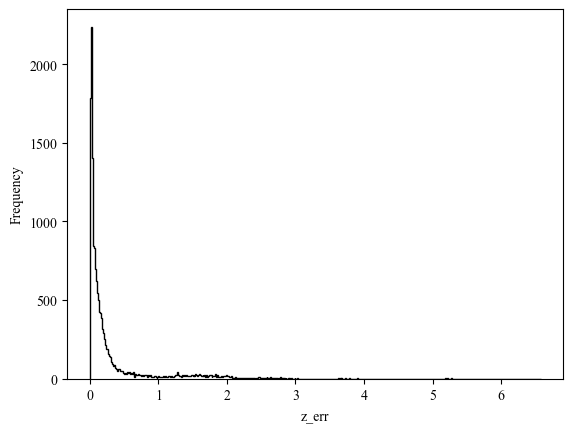

In [15]:
plt.hist(z_err, bins=500, histtype='step', color='k', lw=1)
#plt.xlim(-2, 2)
plt.xlabel('z_err')
plt.ylabel('Frequency')
plt.show()

In [16]:
# print the index where z = -1
np.where(filter_obj.zml == -1)[0].shape

(250,)

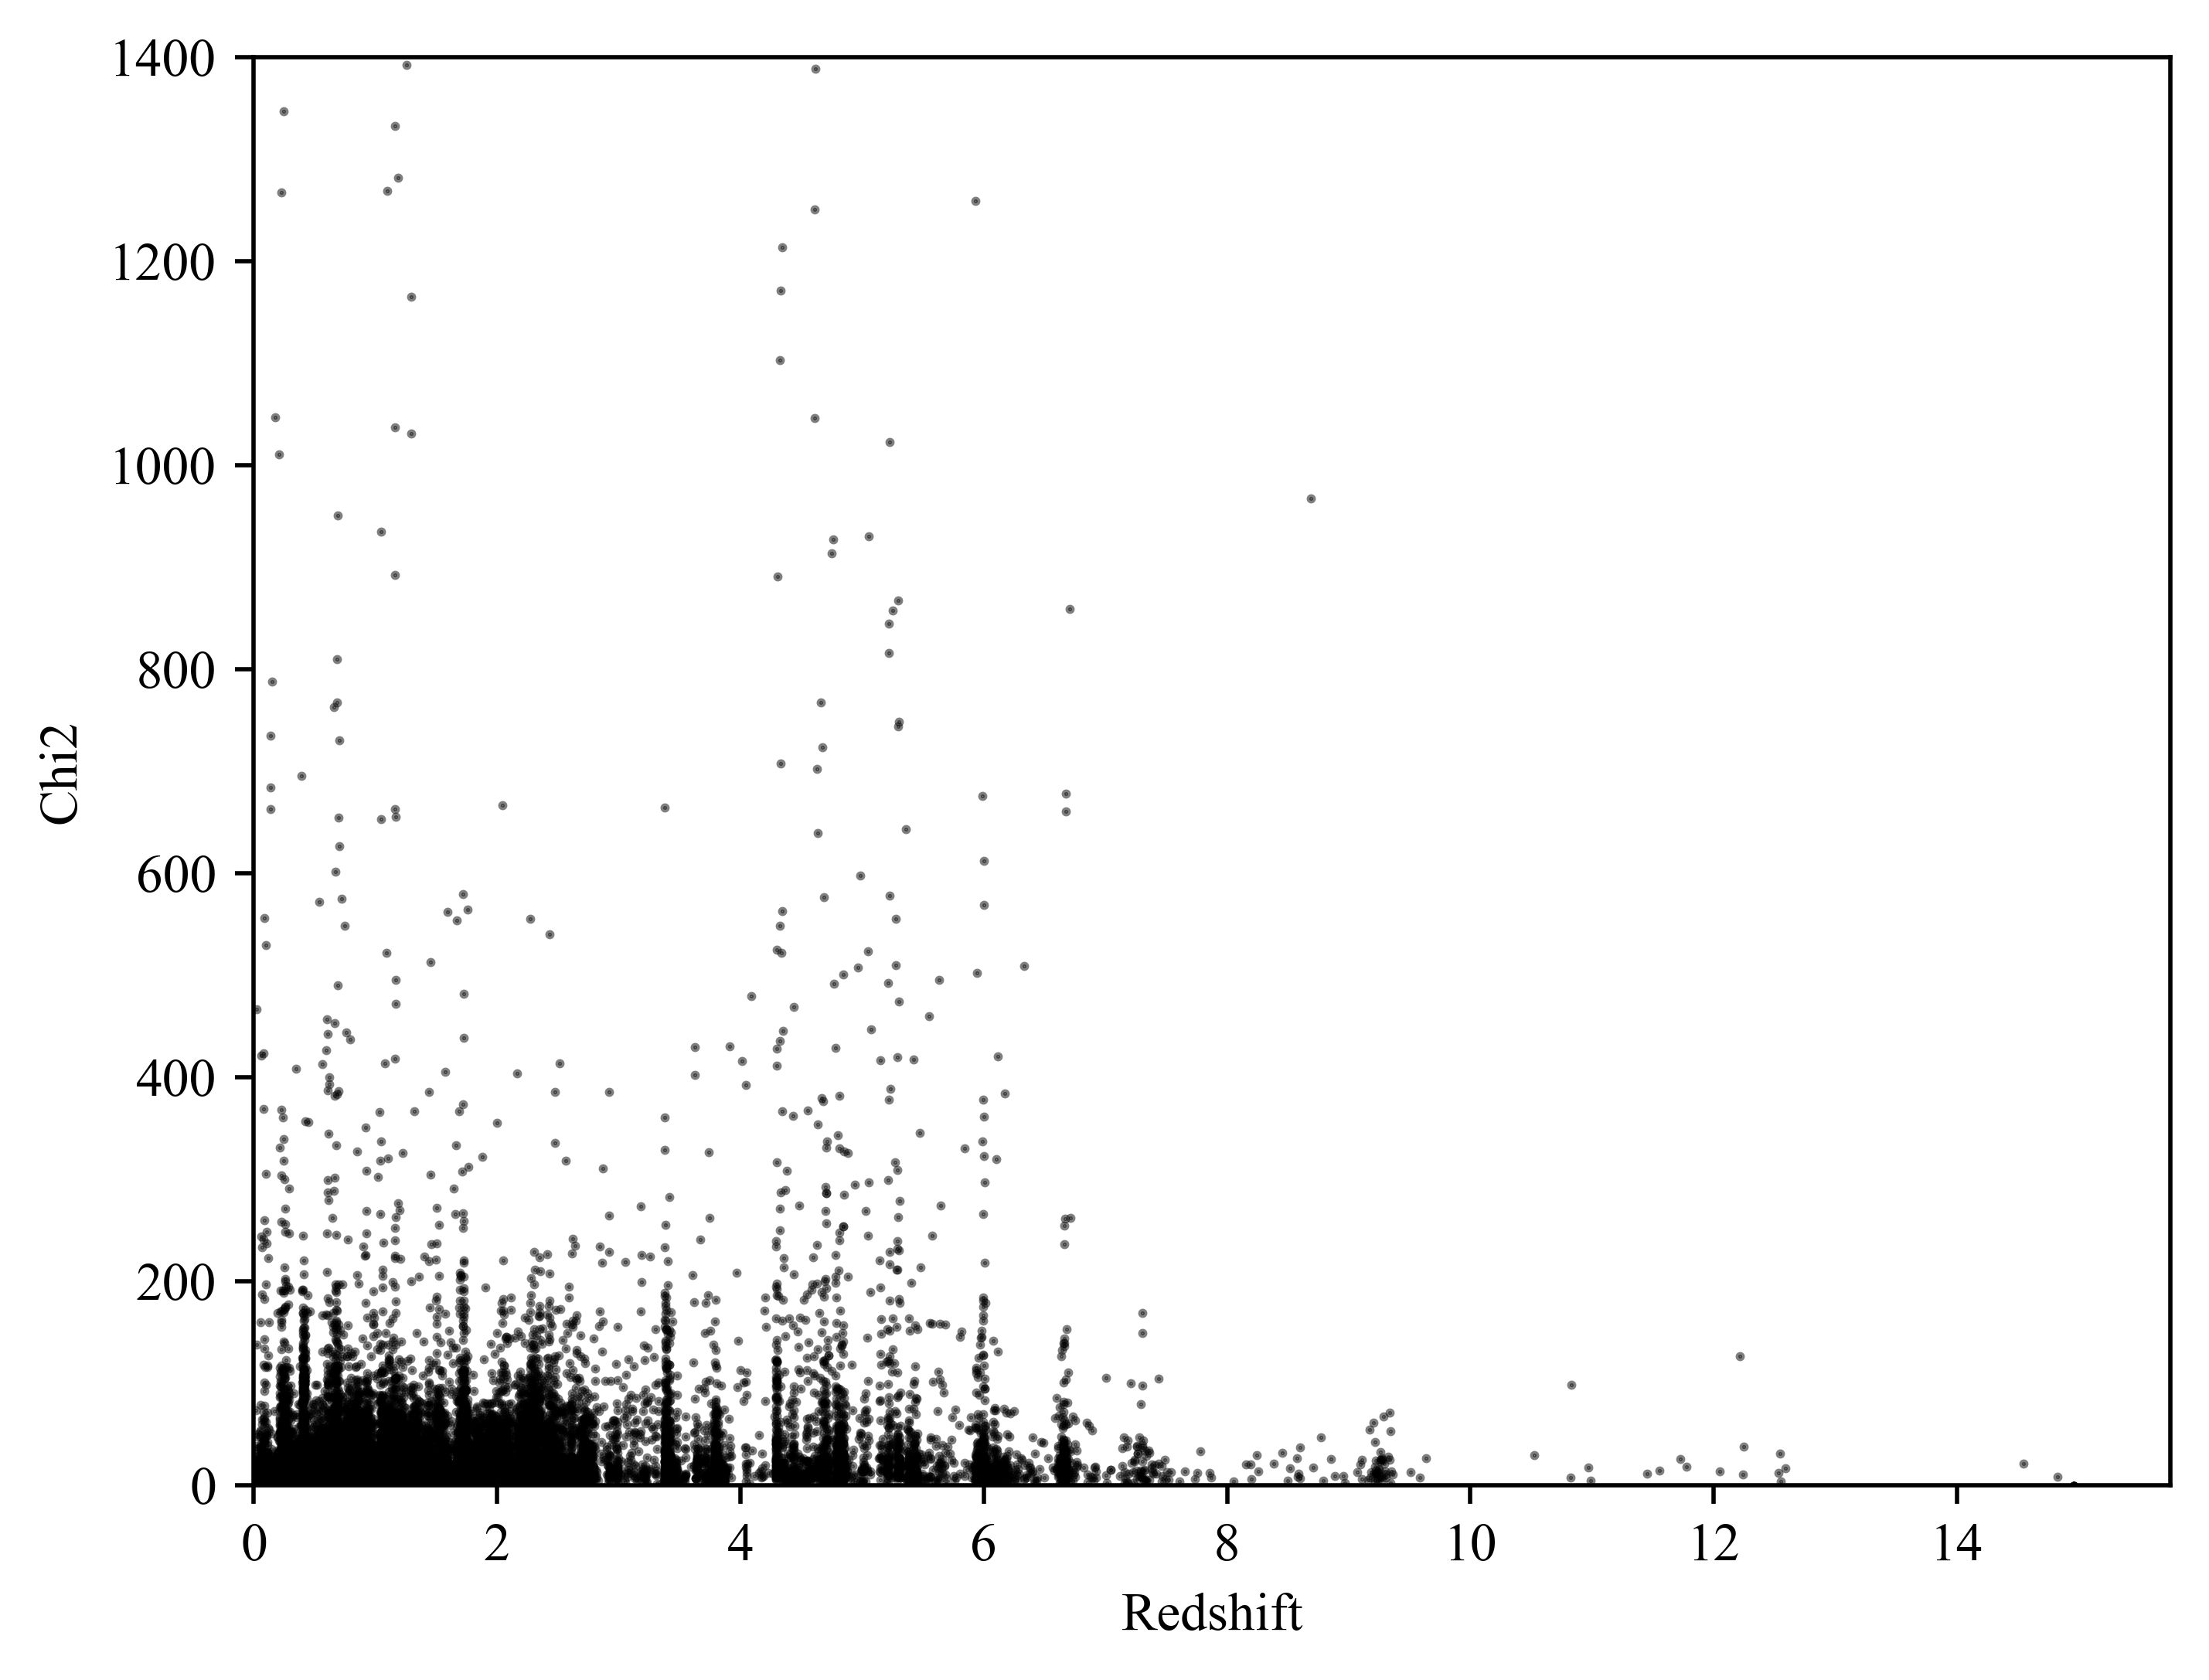

In [17]:
plt.figure(dpi=500)
plt.scatter(filter_obj.zml, filter_obj.chi2_best, s=0.5, c='k', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Chi2')
plt.xlim(0, )
plt.ylim(0, 1400)
plt.show()

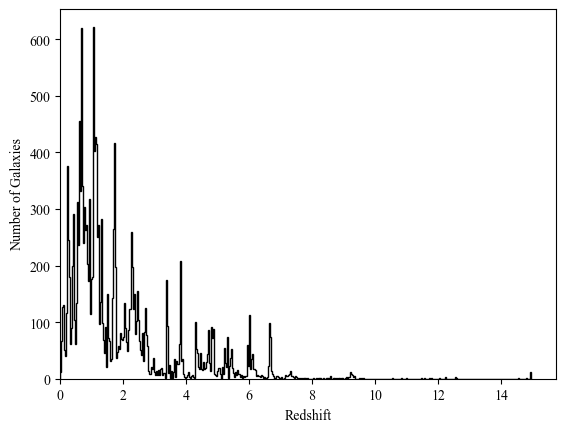

In [18]:
plt.hist(filter_obj.zml, bins=500, histtype='step', color='k', lw=1)
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.xlim(0, )
plt.show()

In [19]:
chis = filter_obj.chi2_best[~(filter_obj.chi2_best == -1)]

C:\Users\blybe\AppData\Local\Temp\ipykernel_16184\871345104.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  figure.gca().set_xlim(0, 10)


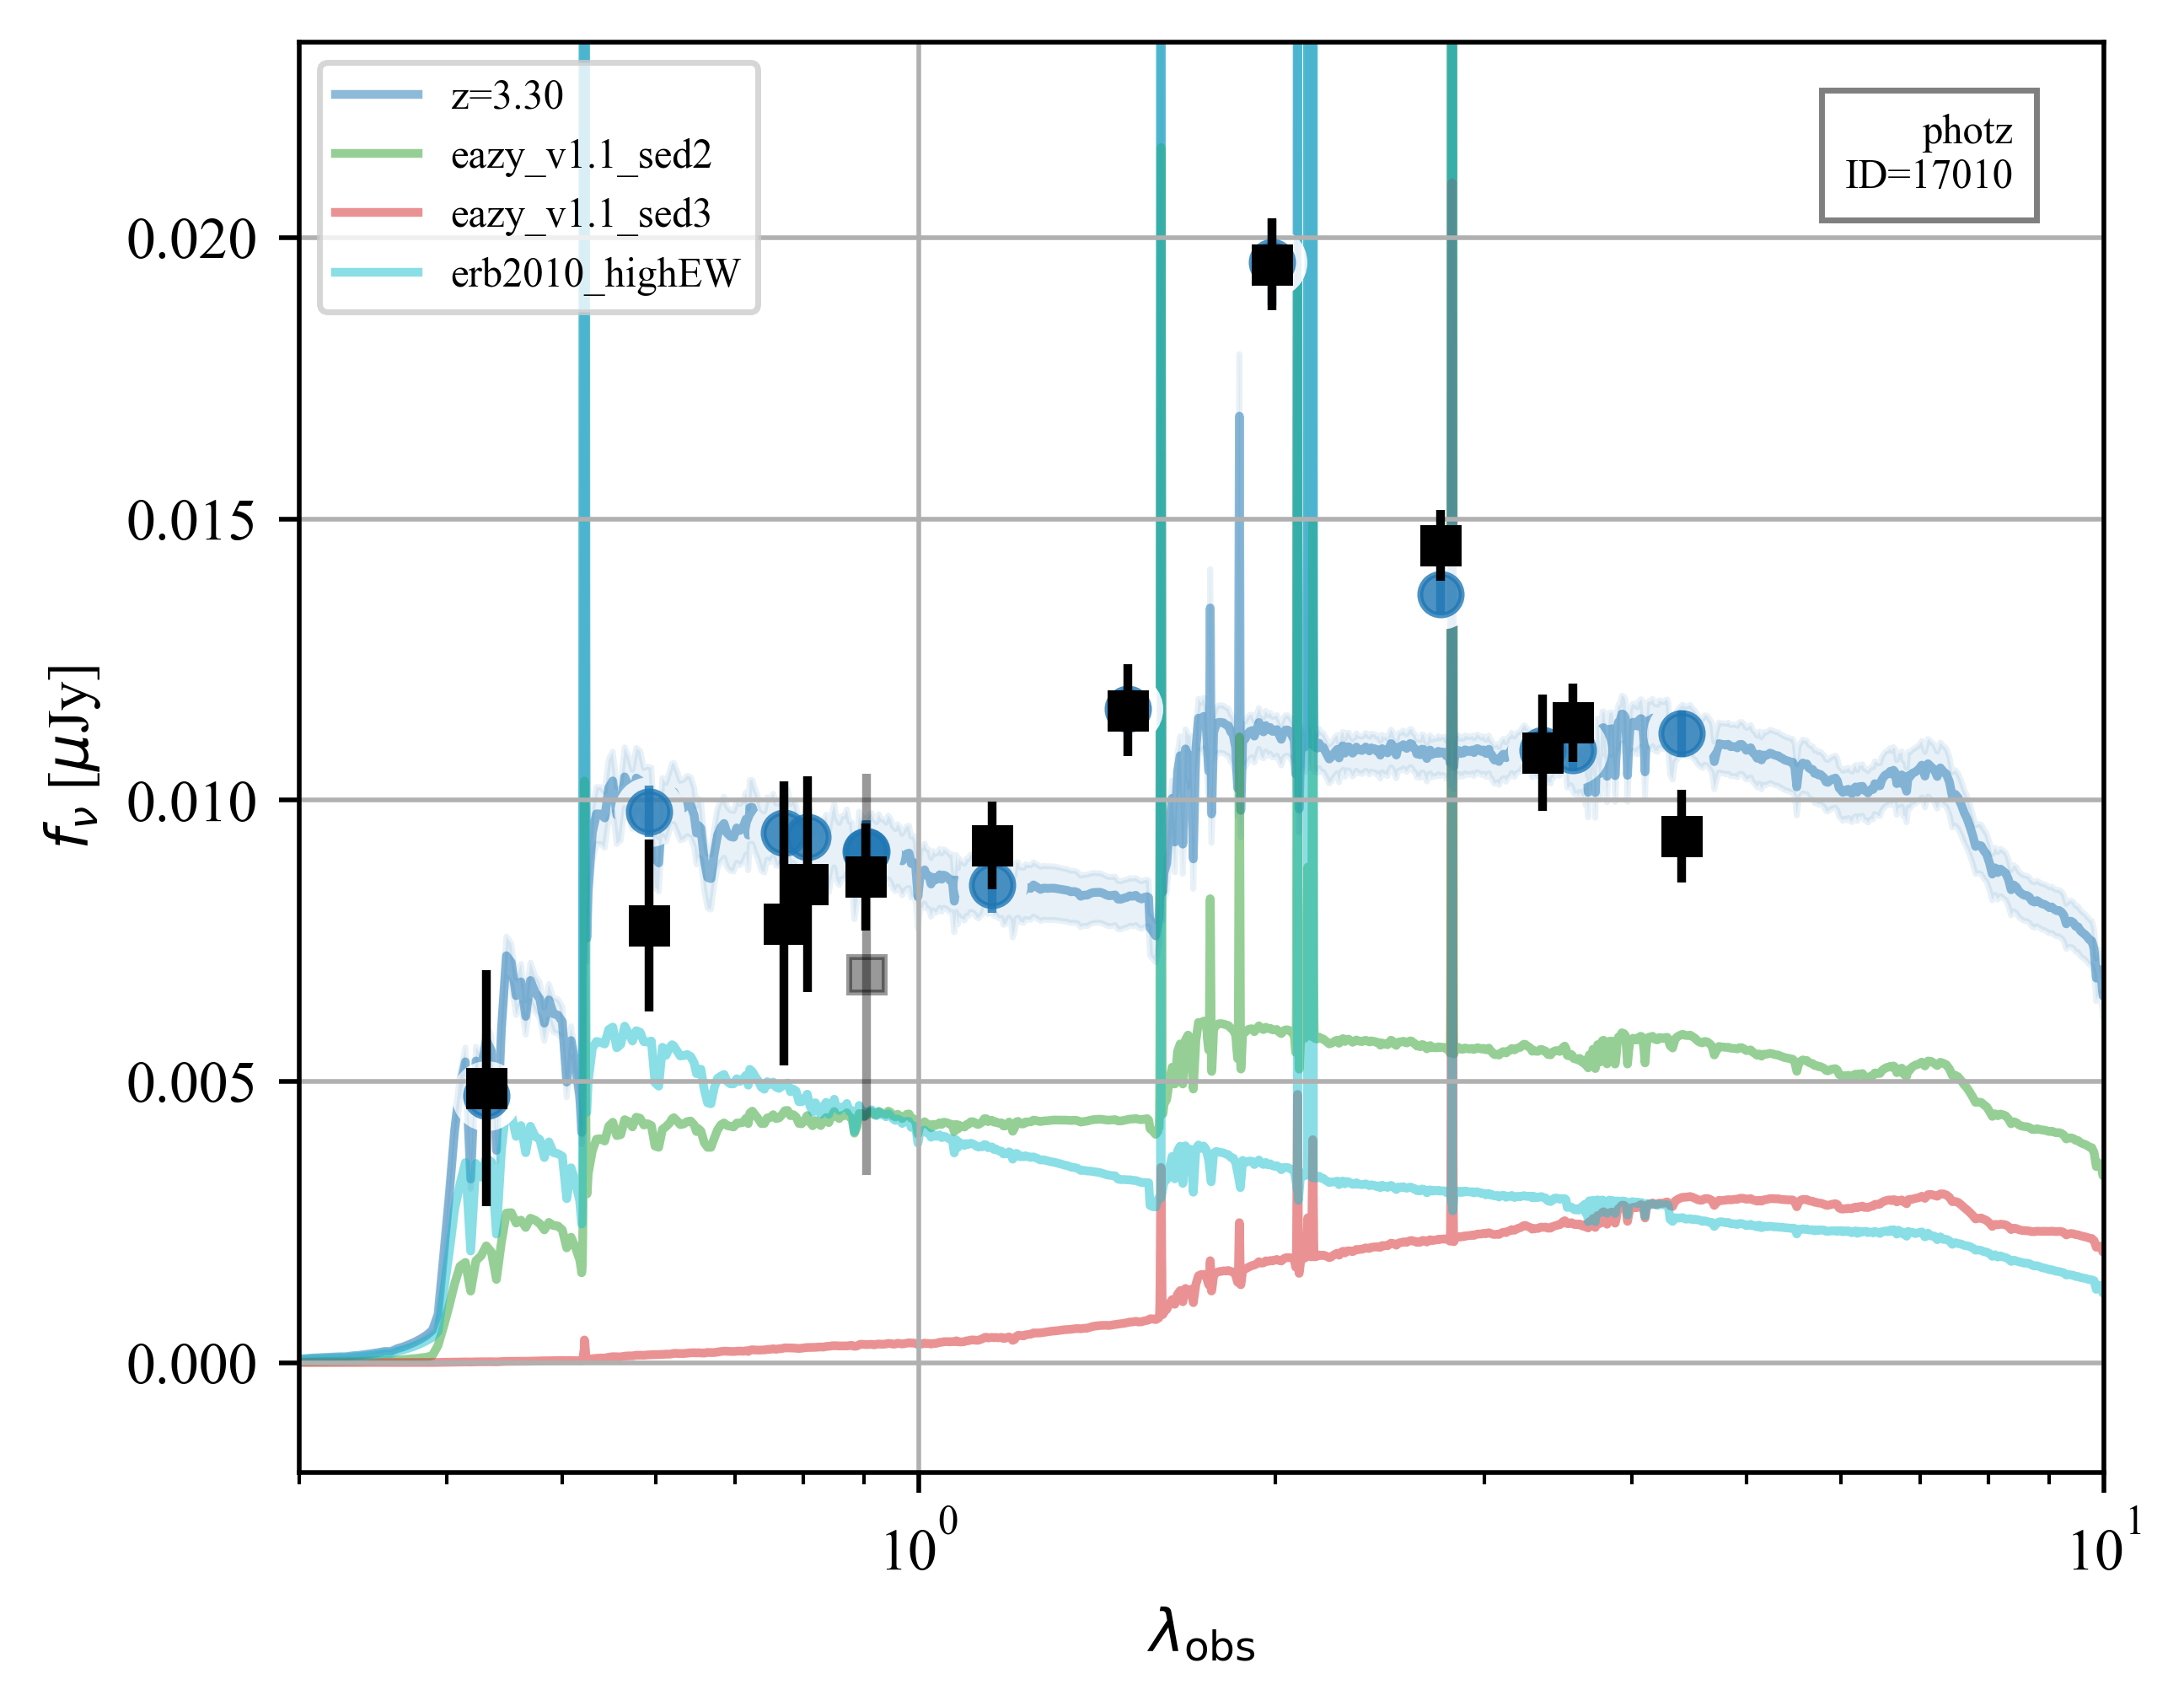

In [20]:
plot_data = filter_obj.show_fit(id_is_idx=True, id=chis.argmin(), show_fnu=True, show_components=True)[1]

figure = plt.gcf()
figure.axes[1].remove()

figure.dpi = 500
figure.figsize = (8, 3)
figure.gca().set_xlim(0, 10)
# make scale normal
figure.gca().set_xscale('log')

plt.show()

In [21]:
plot_data

OrderedDict([('ix', 8437),
             ('id', 17010),
             ('z', 3.2959664),
             ('z_spec', -1.0),
             ('pivot',
              array([ 9022.92216966, 11543.0092693 , 15007.45490818, 19886.47813979,
                     27577.95876438, 33622.87905037, 35682.2776384 ,  4317.87402175,
                     44036.71097715,  5919.06179875,  7693.13981759,  8059.78031884,
                      9036.06815199])),
             ('model',
              array([0.00908538, 0.00849204, 0.01163317, 0.01957086, 0.01366307,
                     0.0108939 , 0.01089559, 0.00474428, 0.01118387, 0.00979893,
                     0.00942166, 0.00934565, 0.00909214])),
             ('emodel',
              array([0.00055281, 0.00049649, 0.00037614, 0.00076498, 0.00032386,
                     0.00034954, 0.00037474, 0.00023698, 0.00041709, 0.00045574,
                     0.00054784, 0.0005467 , 0.00055418])),
             ('fobs',
              array([0.00863669, 0.0091932 , 0.01159

In [22]:
loadfile1 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed1.dat", sep='\s+', header=None)
loadfile2 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed2.dat", sep='\s+', header=None)
loadfile3 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed3.dat", sep='\s+', header=None)
loadfile4 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed4.dat", sep='\s+', header=None)
loadfile5 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed5.dat", sep='\s+', header=None)
loadfile6 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed6.dat", sep='\s+', header=None)
loadfile7 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed7.dat", sep='\s+', header=None)
loadfile8 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/erb2010_highEW.dat", sep='\s+', header=None)
loadfile9 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/Dusty/c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat", sep='\s+', header=None)

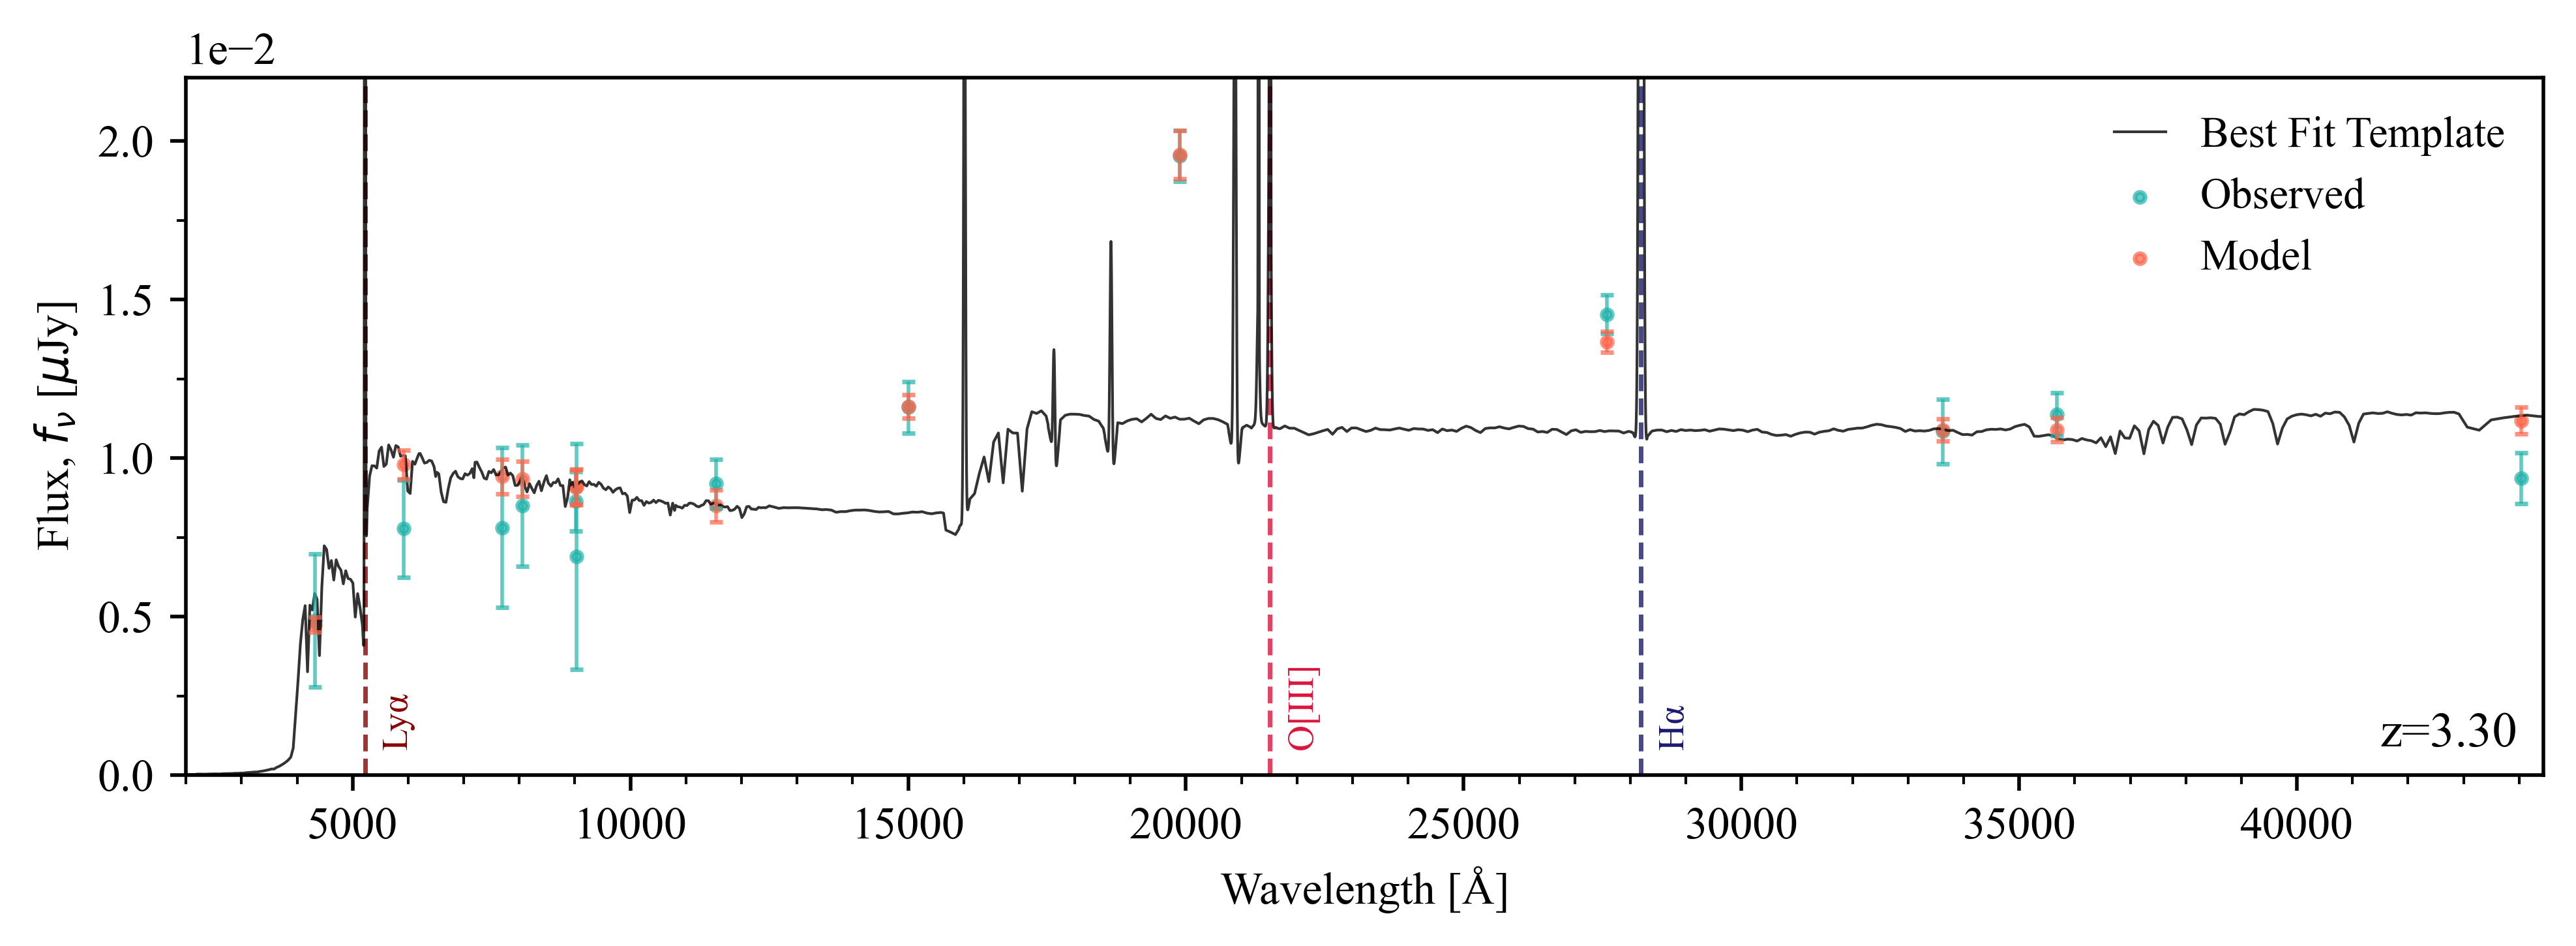

In [23]:
plt.figure(dpi=500, figsize=(8, 3))

# plt.plot([], [], label='z={0:.2f}'.format(plot_data['z']), color='white')
H = ((1+plot_data['z'])*6563)
O = ((1+plot_data['z'])*5007)
LyA = ((1+plot_data['z'])*1216)
y = 0.0008
plt.axvline(H, c='midnightblue', linestyle='--', linewidth=1, alpha=0.8)
plt.text(H+300, y, 'Hα', color='midnightblue', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(O, c='crimson', linestyle='--', linewidth=1, alpha=0.8)
plt.text(O+300, y, 'O[III]', color='crimson', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(LyA, c='darkred', linestyle='--', linewidth=1, alpha=0.8)
plt.text(LyA+300, y, 'Lyα', color='darkred', fontsize=8, ha='left', va='bottom', rotation=90)

plt.plot(plot_data['templz'], plot_data['templf'], c='k', linewidth=0.6, label='Best Fit Template', alpha=0.8)

plt.scatter(plot_data['pivot'], plot_data['fobs'], s=5, c='lightseagreen', alpha=0.7, label='Observed')
plt.errorbar(plot_data['pivot'], plot_data['fobs'], yerr=plot_data['efobs'], c='lightseagreen', alpha=0.7, linewidth=0, elinewidth=0.8, capsize=1.5)

plt.scatter(plot_data['pivot'], plot_data['model'], s=5, c='tomato', alpha=0.7, label='Model')
plt.errorbar(plot_data['pivot'], plot_data['model'], yerr=plot_data['emodel'], c='tomato', alpha=0.7, linewidth=0, elinewidth=0.8, capsize=1.5)
# plt.plot(loadfile2[0], loadfile2[1], c='k', linewidth=0.6, alpha=0.5)
# plt.plot(loadfile3[0], loadfile3[1], c='k', linewidth=0.6, alpha=0.5)
# plt.plot(loadfile8[0], loadfile8[1], c='k', linewidth=0.6, alpha=0.5)

plt.text(41500, 0.002, 'z={0:.2f}'.format(plot_data['z']), fontsize=11, ha='left', va='top')
plt.legend(frameon=False, loc='upper right', fontsize=9.5, handlelength=1.2)
#legend.get_frame().set_alpha(0.5)  # Set transparency of legend background

# format the y axis to scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.gca().xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
plt.gca().yaxis.set_minor_locator(mtick.AutoMinorLocator(2))

plt.ylabel('Flux, $f_ν$ [$μ$Jy]')
plt.xlabel('Wavelength [Å]')
plt.ylim(0, 0.022)
plt.xlim(2000, 44437) # 40000

plt.tight_layout()
plt.show()

In [128]:
dataframe

{'id': array([    2,     3,     9, ..., 36631, 36643, 36644], dtype=int64),
 'RA': array([53.17174764, 53.17162795, 53.17181823, ..., 53.15796292,
        53.1571343 , 53.15710628]),
 'Dec': array([-27.84716785, -27.8471556 , -27.84711731, ..., -27.72466473,
        -27.7239528 , -27.72393197]),
 'x-position': array([11805.10781026, 11817.80650486, 11797.6158255 , ...,
        13263.50730218, 13351.50137464, 13354.47723462]),
 'y-position': array([ 2958.66636188,  2960.14167365,  2964.72913311, ...,
        17659.55152394, 17745.00822814, 17747.50874866]),
 'f090w': array([0.00482244, 0.00407245, 0.00168389, ..., 0.01150867, 0.00224294,
        0.00201399]),
 'f115w': array([9.39585149e-04, 5.45554343e-05, 1.78219394e-04, ...,
        1.14757222e-02, 2.82897831e-03, 2.07521891e-03]),
 'f150w': array([-0.00096402,  0.00074744, -0.00013608, ...,  0.01307921,
         0.00248433,  0.00225939]),
 'f200w': array([ 0.00028181,  0.00063472, -0.00128107, ...,  0.02517584,
         0.00192443, 

In [ ]:
def filter_dict(data):
    filtered_data = {}
    for key, values in data.items():
        if key == 'f356w':  # Assuming 'f356w_err' is another key in your dictionary
            f356w_err = data['f356w_err']  # Assuming 'f356w_err' exists in your dictionary
            filtered_values = [val for val, err in zip(values, f356w_err) if val > err * 5]
            filtered_data[key] = filtered_values
        else:
            filtered_data[key] = values
    return filtered_data

In [198]:
# dataframe = pd.read_csv(os.path.join(homedir, "Output", "Archive", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors.txt"), delim_whitespace=True)
# del dataframe['id']

dataframe["z_phot"] = filter_obj.zml
dataframe["chi2_best"] = filter_obj.chi2_best
dataframe["z_err"] = z_err

# 5 SIGMA CUT
# Drop rows with f356w < f356w_err*
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe[dataframe['f356w'] > dataframe['f356w_err']*5]

# calculate magnitudes
dataframe["mag_f335m"] = -(2.5 * np.log10(dataframe["f335m"])) + 23.9
dataframe["mag_f356w"] = -(2.5 * np.log10(dataframe["f356w"])) + 23.9
dataframe["mag_f410m"] = -(2.5 * np.log10(dataframe["f410m"])) + 23.9
#dataframe["mag_f444w"] = -2.5 * np.log10(dataframe["f444w"]) + 23.9


# Drop rows with mag_f356w < 29.6
dataframe = dataframe[dataframe['mag_f356w'] < 29.6]

# fill any nan values with 'NAN' and re-number id column
for filname in allfilename:
    dataframe[filname][dataframe[filname] == -99.0] = 0.0
# dataframe = dataframe.fillna(value='NAN')
    
dataframe = dataframe.to_dict(orient='list')
dataframe['id'] = np.arange(0, len(dataframe['id']))

#Put the id column at the beginning
# cols = dataframe.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# dataframe = dataframe[cols]

# Save dataframe as ascii file ## CHANGE FILE NAME HERE PLEASE ##
with open(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_no5sigma_withZ_MODIFIED.txt'), 'w+') as file:
    file.write(' '.join([f"{key} " for key in dataframe.keys()]))  # Convert the list of keys to a string
    file.write('\n')
    for i in range(len(dataframe['id'])): 
        writeline = ''
        for val in dataframe.values():
            writeline += (f"{val[i]} ")
        writeline += '\n'
        file.write(writeline)

#dataframe.to_csv(, sep=' ', index=False)

c:\Users\blybe\miniconda3\envs\astro-env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\blybe\miniconda3\envs\astro-env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\blybe\AppData\Local\Temp\ipykernel_14612\768141039.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col

In [182]:
# load data
data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ_MODIFIED.txt'), delim_whitespace=True)
data.columns

C:\Users\blybe\AppData\Local\Temp\ipykernel_14612\868314309.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ_MODIFIED.txt'), delim_whitespace=True)


Index(['id', 'RA', 'Dec', 'x-position', 'y-position', 'f090w', 'f115w',
       'f150w', 'f200w', 'f277w', 'f335m', 'f356w', 'f410m', 'f435w', 'f444w',
       'f606w', 'f775w', 'f814w', 'f850lp', 'f090w_err', 'f115w_err',
       'f150w_err', 'f200w_err', 'f277w_err', 'f335m_err', 'f356w_err',
       'f410m_err', 'f435w_err', 'f444w_err', 'f606w_err', 'f775w_err',
       'f814w_err', 'f850lp_err', 'z_phot', 'chi2_best', 'z_err', 'mag_f335m',
       'mag_f356w', 'mag_f410m'],
      dtype='object')

In [131]:
# show all cols when printing
pd.set_option('display.max_columns', None)
data[:20]

,id,RA,Dec,x-position,y-position,f090w,f115w,f150w,f200w,f277w,f335m,f356w,f410m,f435w,f444w,f606w,f775w,f814w,f850lp,f090w_err,f115w_err,f150w_err,f200w_err,f277w_err,f335m_err,f356w_err,f410m_err,f435w_err,f444w_err,f606w_err,f775w_err,f814w_err,f850lp_err,z_phot,chi2_best,z_err,mag_f335m,mag_f356w,mag_f410m
0,0,53.170847,-27.846690,11900.596423,3016.091202,0.034247,0.035360,0.035707,0.039747,0.040840,0.040047,0.041427,0.034351,0.017131,0.023689,0.013694,0.022889,0.023030,0.023217,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,0.857172,47.594826,-0.010708,27.393586,27.356798,27.560165
1,1,53.171597,-27.846238,11821.012876,3070.296079,0.018574,0.022875,0.022863,0.022598,0.020276,0.017460,0.017359,0.014364,0.016108,0.010245,0.008245,0.016958,0.016590,0.016280,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,0.619441,31.281168,-0.002079,28.294876,28.301166,28.506788
2,2,53.170415,-27.846126,11946.465761,3083.765373,0.002529,0.004552,0.004514,0.006606,0.004867,0.005913,0.006082,0.006540,0.000887,0.004048,0.001267,-0.001517,0.000263,0.000407,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,1.085224,8.853850,-0.199833,29.470558,29.439950,29.361137
3,3,53.168789,-27.845896,12119.017701,3111.370567,0.003378,0.003567,0.004869,0.004720,0.005317,0.004392,0.008009,0.002650,0.005919,0.002349,0.004623,0.007785,0.003251,0.003241,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,0.714649,27.470732,-0.171995,29.793381,29.141046,30.342089
4,4,53.168823,-27.845868,12115.399200,3114.803996,0.006550,0.006356,0.007468,0.009399,0.009168,0.009320,0.008029,0.008968,0.006263,0.004572,0.006081,0.009063,0.004296,0.011215,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,0.533689,9.435801,-0.025793,28.976451,29.138347,29.018302
5,5,53.168985,-27.845825,12098.191601,3119.926827,0.007345,0.009038,0.013918,0.022485,0.013210,0.013072,0.012139,0.010703,0.010124,0.011645,0.007603,0.004254,0.008384,0.013364,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,2.675462,10.539010,-0.003590,28.609183,28.689522,28.826210
6,6,53.170622,-27.845725,11924.460435,3131.878961,0.004149,0.003824,0.004659,0.007350,0.004675,0.006506,0.005581,0.003862,0.005243,0.003244,0.004898,0.001042,0.002995,0.006082,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,2.539610,9.155191,0.664867,29.366724,29.533156,29.932840
7,7,53.172163,-27.845701,11760.931450,3134.645148,0.007089,0.007365,0.007497,0.011589,0.011371,0.011933,0.011776,0.010599,0.004632,0.008560,0.004108,0.005129,0.006231,0.001197,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,0.958304,5.763097,0.020490,28.708105,28.722498,28.836830
8,8,53.171059,-27.845683,11878.058737,3136.865544,0.004848,0.002886,0.005340,0.007848,0.006237,0.006774,0.005766,0.007269,0.006156,0.004528,0.000372,0.002928,0.002988,0.001415,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,2.721080,12.394375,0.797128,29.322897,29.497879,29.246364
9,9,53.170150,-27.845540,11974.579708,3154.106162,0.015216,0.018954,0.029961,0.023451,0.010997,0.011290,0.010304,0.011011,0.027919,0.009196,0.017207,0.012749,0.014887,0.013181,0.000934,0.000767,0.000798,0.000783,0.000588,0.001012,0.000665,0.000972,0.002101,0.000806,0.001529,0.00252,0.001909,0.003567,1.720771,76.017532,-0.300982,28.768289,28.867485,28.795421


## Examine Templates

In [93]:
loadfile1 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed1.dat", sep='\s+', header=None)
loadfile2 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed2.dat", sep='\s+', header=None)
loadfile3 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed3.dat", sep='\s+', header=None)
loadfile4 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed4.dat", sep='\s+', header=None)
loadfile5 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed5.dat", sep='\s+', header=None)
loadfile6 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed6.dat", sep='\s+', header=None)
loadfile7 = pd.read_csv("C:/Users/blybe/miniconda3/envs/astro-env/Lib/site-packages/eazy/eazy-photoz/templates/EAZY_v1.1_lines/eazy_v1.1_sed7.dat", sep='\s+', header=None)

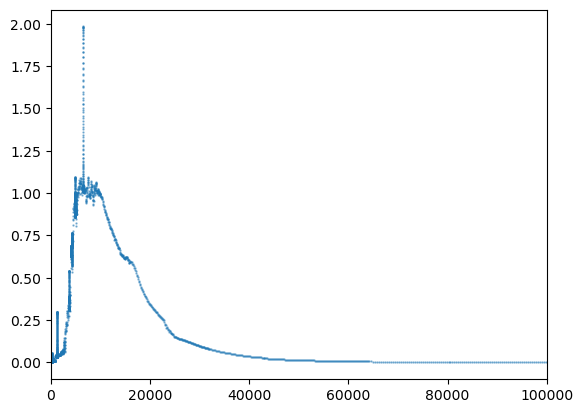

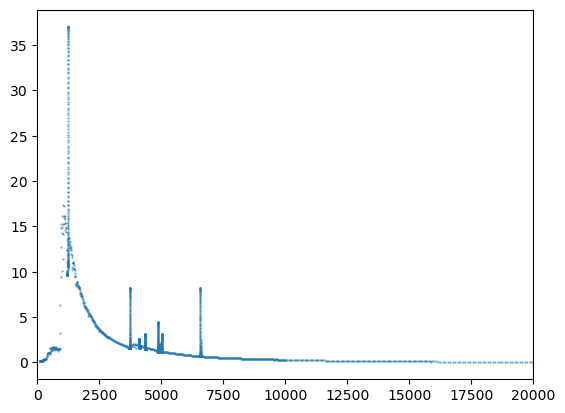

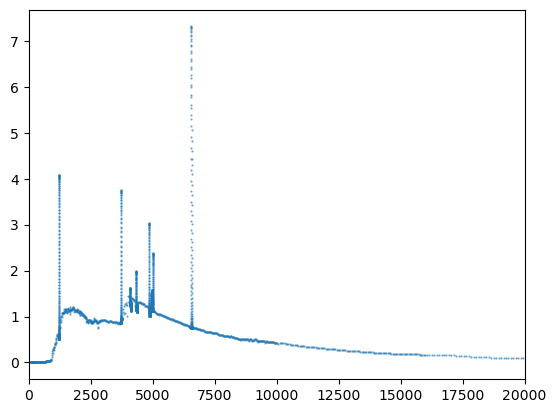

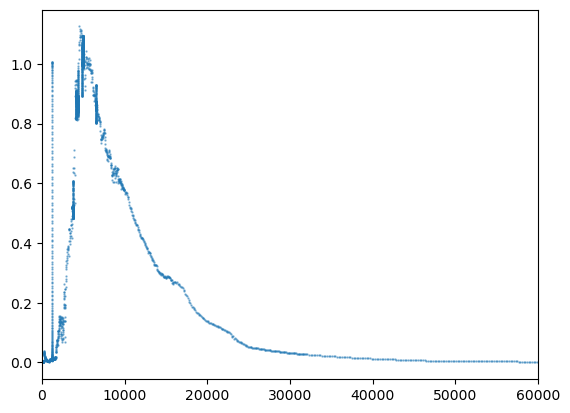

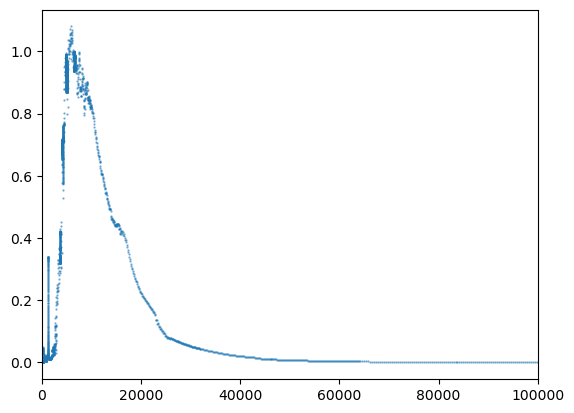

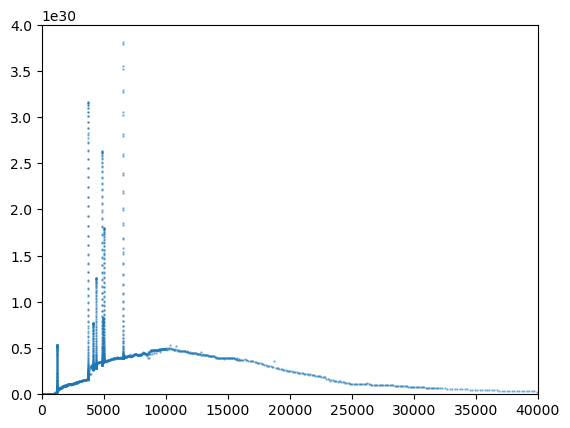

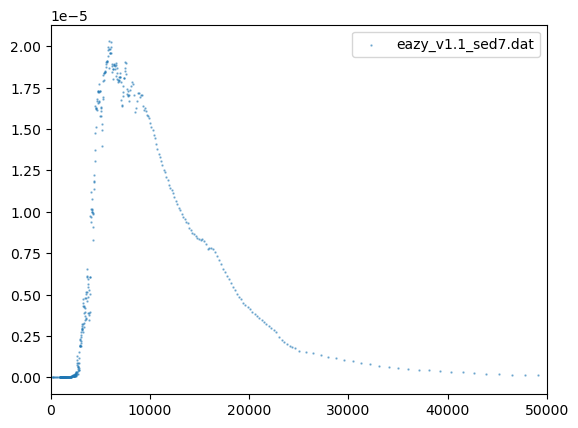

In [59]:
plt.scatter(loadfile1[0], loadfile1[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed1.dat')
plt.xlim(0, 1e5)
plt.show()

plt.scatter(loadfile2[0], loadfile2[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed2.dat')
plt.xlim(0, 2e4)
plt.show()

plt.scatter(loadfile3[0], loadfile3[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed3.dat')
plt.xlim(0, 2e4)
plt.show()

plt.scatter(loadfile4[0], loadfile4[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed4.dat')
plt.xlim(0, 6e4)
plt.show()

plt.scatter(loadfile5[0], loadfile5[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed5.dat')
plt.xlim(0, 1e5)
plt.show()

plt.scatter(loadfile6[0], loadfile6[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed6.dat')
plt.xlim(0, 4e4)
plt.ylim(0, 4e30)
plt.show()

plt.scatter(loadfile7[0], loadfile7[1], s=0.5, alpha=0.5, label='eazy_v1.1_sed7.dat')
plt.xlim(0, 5e4)
plt.legend()
plt.show()

In [ ]:
# read in the zspec file (ascii format)
# header begins with #

data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), delim_whitespace=True)
zspec_data = pd.read_csv(os.path.join(homedir, 'Output', 'blythe_jades_N1281_zspec.cat'), delim_whitespace=True)

/tmp/ipykernel_1971147/3787260123.py:4: DtypeWarning: Columns (45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), delim_whitespace=True)


In [ ]:
data.columns

Index(['id', 'RA', 'Dec', 'x-position', 'y-position', 'f090w', 'f115w',
       'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m',
       'f430m', 'f435w', 'f444w', 'f460m', 'f480m', 'f606w', 'f775w', 'f814w',
       'f850lp', 'f090w_err', 'f115w_err', 'f150w_err', 'f182m_err',
       'f200w_err', 'f210m_err', 'f277w_err', 'f335m_err', 'f356w_err',
       'f410m_err', 'f430m_err', 'f435w_err', 'f444w_err', 'f460m_err',
       'f480m_err', 'f606w_err', 'f775w_err', 'f814w_err', 'f850lp_err',
       'z_spec', 'chi2_best', 'mag_f335m', 'mag_f356w', 'mag_f410m',
       'mag_f444w'],
      dtype='object')

In [ ]:
#zspec_data['id'] = np.arange(0, len(zspec_data))

# # put to the first column
# cols = zspec_data.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# zspec_data = zspec_data[cols]

# Save dataframe as ascii file
# zspec_data.to_csv(os.path.join(homedir, 'Output', 'blythe_jades_N1281_zspec.cat'), sep=' ')

In [ ]:
# read in 